*Universidade Federal do Rio Grande do Sul (UFRGS)*

*Programa de Pós-Graduação em Engenharia Civil (PPGEC)*
___
PEC00145 - CONFIABILIDADE ESTRUTURAL
---
### Trabalho Final: Resolução dos problemas pelos métodos FORM e Monte Carlo

*Prof. Herbert Martins Gomes (PPGEC/UFRGS)*

*Aluno: Daniel B. M. Matos (PPGEC/UFRGS)*

___

## 1 Introdução

Este trabalho tem objetivo a resolução de 6 exercícios de confiabilidade pelos métodos FORM e Monte Carlo. Para tal, Utiliza-se a classe ```reliability```, disponibilizida em anexo a esse arquivo. A importação da classe está exposta na célula abaixo.


In [1]:
from reliability import *
n = 500000
nl = 10

## Problema 1

A seguinte função de estado limite não-linear é frequentemente utilizada para testar (Benchmark) algoritmos de avaliação de confiabilidade:
\begin{align}
g(x) = X_1^3+X_1^2X_2+X_2^3 -18
\end{align}

onde 𝑋1: N(10, 5) e 𝑋2: N(9.9, 5).


A príncipio, plota-se a função de estado limite para visualizar a presença de múltiplos mínimos.

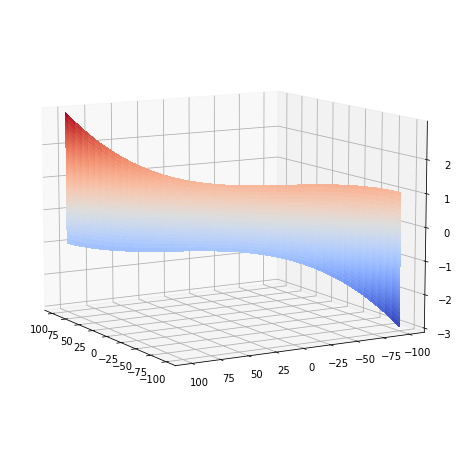

In [2]:
def FELFORM1_plot(X,Y):
    return X**3+X**2*Y+Y**3-18
from matplotlib import cm
t = np.zeros((2,100))
t[0] = t[1] = np.linspace(-100,100,100)
X,Y = np.meshgrid(t[0],t[1])
fig, ax = plt.subplots(figsize = (8,8),subplot_kw={"projection": "3d"})
surf = ax.plot_surface(t[0], t[1], FELFORM1_plot(X,Y), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(10, 150)

In [3]:
def FELFORM1(x):
    return x[0]**3 + x[0]**2*x[1] + x[1]**3 - 18
def FELMC1(x):
    return x[0,:]**3 + x[0,:]**2*x[1,:] + x[1,:]**3 - 18

mean = np.array([10,9.9])  # vetor de médias
std  = np.array([5,5])     # vetor de desvios padrões

dist = ['normal','normal']   

rho = np.array([[1,0],
                [0,1]],)    

#betaF1 = reliability.FORM(FELFORM1,mean,std,dist,rho)
betaM1 = reliability.MONTECARLO(FELMC1,mean,std,dist,rho,n,nl)  


--------------------------------------------- 
                Monte Carlo              
 -------------------------------------------- 
 No de simulações:5e+06 
 beta = 2.525 
 CVPf =     1% 
 Pf   = 5.778e-03 
 Chamadas da FEL = 5000000 



O algoritmo FORM, diferentemente de Monte Carlo, não converge. Isso é relatado no trabalho de Meng,Pu e Zhou (2018), onde desenvolve-se um algoritmo para controle de problemas caóticos, como o apresentado acima. O valor obtido pela simulação de Monte Carlo é condizente com o valor apresentados pelos autores citados anteriormente

## Problema 2
Uma treliça de cobertura é carregada uniformemente como indicado na Figura 1. As barras sob compressão são de concreto armado e as sob tração são de aço.

<img src="Figura1.png" alt="Figura 1" class="bg-primary" width="600px">

A função de estado limite para deflexões máximas limite no meio do vão 
(𝛿𝑙𝑖𝑚 = 0.03) pode ser colocada como:

\begin{align}
g(x) = 0.03 - \frac{qL^2}{2}\left(\frac{3.81}{A_cE_c}+\frac{1.13}{A_SE_S}\right)
\end{align}

onde 𝐴𝑐,𝐸𝑐 são a área e o módulo elástico do concreto e 𝐴𝑠, 𝐸𝑠 os mesmos valores para o aço, 𝑞 a carga distribuída e 𝐿 o vão. O problema é de 6 variáveis aleatórias com propriedades estatísticas dadas por: Não-correlacionadas Gaussianas com 𝑞: 
N(2E4,1.4xE3) N/m, 𝐿: N(12,0.12) m, 𝐴𝑠: N(9.82E-4,5.9852xE-5) m2, 𝐴𝑐: N(0.04, 4.8E-3) m2, 𝐸𝑠: N(1E11,6E9)Pa, 𝐸𝑐: N(2E10,1.2E9)Pa. Avalie a confiabilidade pelo método FORM e pelo método de Monte Carlo.


In [4]:
def FELFORM2(x):
    return 0.03-(x[0]*x[1]**2/2)*(3.81/(x[2]*x[3])+1.13/(x[4]*x[5]))
def FELMC2(x):
    return 0.03-(x[0,:]*x[1,:]**2/2)*(3.81/(x[2,:]*x[3,:])+1.13/(x[4,:]*x[5,:]))

dist = ['normal','normal','normal','normal','normal','normal'] 
rho = np.eye(6)
mean = np.array([2e4,12,0.04,2e10,9.82e-4,1e11])          # vetor de médias
std  = np.array([1.4e3,0.12,4.8e-3,1.2e9,5.9852e-5,6e9])  # vetor de desvios padrões

betaF2 = reliability.FORM(FELFORM2,mean,std,dist,rho)
betaM2 = reliability.MONTECARLO(FELMC2,mean,std,dist,rho,n,nl) 

--------------------------------------------- 
                      FORM           
 -------------------------------------------- 
 Iteração:    8 
 Alfa =[-0.618 -0.194  0.39   0.177  0.449  0.441] 
 Beta = 2.421167 
 Pfalha = 7.735e-03 
 Critério = 5.852e-06 
 Chamadas da FEL = 5.6e+01 
MPP =[ 1.497  0.47  -0.944 -0.43  -1.087 -1.068]
--------------------------------------------- 
                Monte Carlo              
 -------------------------------------------- 
 No de simulações:5e+06 
 beta = 2.341 
 CVPf =     0% 
 Pf   = 9.605e-03 
 Chamadas da FEL = 5000000 



O valor encontrado pelo FORM é similar ao encontrado no trabalho de Keshtegar e Meng (2017) e a simulação de Monte Carlo coincide com o encontrado em Zhao et al (2015).

## Problema 3
Seja uma coluna esbelta indicada na Figura 2. 

<img src="Figura2.png" alt="Figura 2" class="bg-primary" width="600px">

Ela tem sua base conectada a uma mola rotacional não linear, na qual a relação entre a rotação 𝛼 e momento aplicado 𝑀 vem dado por $𝑀 = 𝑏 \sqrt{𝛼}$ ,sendo 𝑏 um parâmetro. A função de estado limite neste caso vem dada por:
\begin{align}
g(x) &= 40 - \delta\\
\delta&= t\left[tan(\phi)-\phi+\frac{b^2\left[1+\sqrt{1-4\frac{HEItan^2(\phi)}{b^2}}\right]^2}{4HEItan(\phi)} \right]\\
\phi&= L\sqrt{\frac{P}{EI}} \\ 
t&= \frac{H}{EI\left(\frac{P}{EI}\right)^{1.5}}
\end{align}

onde 𝑃 é a carga axial compressiva, 𝐻 é a carga horizontal, 𝐸 é o módulo elástico do material, 𝐿 é o comprimento da coluna, 𝐼 é o momento de inércia da seção e 𝑏 é o parâmetro da mola não-linear rotacional.

O problema é de 6 variáveis aleatórias com propriedades estatísticas dadas 
por: Não-correlacionadas Gaussianas com 𝑃:N(1E6,0.2E6), 𝐻: N(1E4,0.2E4),E:N(2E4,0.2E4),𝐿:N(1E4,0.05E4),𝐼:N(1.0417E10,5.2085E8), 𝐵: N(0.4167,0.04167). Avalie a confiabilidade pelo método FORM e pelo método de Monte Carlo.






In [5]:
def FELFORM3(x):
    t     = x[0]/(x[1]*x[2]*(x[3]/x[1]/x[2])**1.5)
    phi   = x[4]*np.sqrt(x[3]/x[1]/x[2])
    HEI   = (x[0]*x[1]*x[2]*np.tan(phi)**2)/x[5]**2
    #delta = t*(np.tan(phi)-phi+((x[5]**2)*(1+np.sqrt(1-4*HEI)))/(4*x[0]*x[1]*x[2]*np.tan(phi)))
    delta = t*(np.tan(phi)-phi+((x[5]**2*(1+np.sqrt(1-4*((x[0]*x[1]*x[2]*np.tan(phi)**2)/x[5]**2)))**2)/(4*x[0]*x[1]*x[2]*np.tan(phi))))
    #print(delta)
    return 40 - delta

def FELMC3(x):
    t     = x[0,:]/(x[1,:]*x[2,:]*(x[3,:]/x[1,:]/x[2,:])**1.5)
    phi   = x[4,:]*np.sqrt(x[3,:]/x[1,:]/x[2,:])
    delta = t*(np.tan(phi)-phi+((x[5,:]**2*(1+np.sqrt(1-4*((x[0,:]*x[1,:]*x[2,:]*np.tan(phi)**2)/x[5,:]**2)))**2)/(
        4*x[0,:]*x[1,:]*x[2,:]*np.tan(phi))))
    return 40 - delta
    

dist = ['normal','normal','normal','normal','normal','normal'] 
rho = np.eye(6)
mean = np.array([1e4,2e4,1.0417e10,1e6,1e4,0.4167])              # vetor de médias
std  = np.array([0.2e4, 0.2e4, 0.052085e10, 0.2e6,0.05e4,0.04167])  # vetor de desvios padrões

betaF3 = reliability.FORM(FELFORM3,mean,std,dist,rho)
betaM3 = reliability.MONTECARLO(FELMC3,mean,std,dist,rho,n,nl) 

--------------------------------------------- 
                      FORM           
 -------------------------------------------- 
 Iteração:    1 
 Alfa =[nan nan nan nan nan nan] 
 Beta =   nan 
 Pfalha =   nan 
 Critério =   nan 
 Chamadas da FEL = 7.0e+00 
MPP =[nan nan nan nan nan nan]


C:\Users\00312265\AppData\Local\Temp\ipykernel_9380\51961650.py:6: RuntimeWarning: invalid value encountered in sqrt
  delta = t*(np.tan(phi)-phi+((x[5]**2*(1+np.sqrt(1-4*((x[0]*x[1]*x[2]*np.tan(phi)**2)/x[5]**2)))**2)/(4*x[0]*x[1]*x[2]*np.tan(phi))))
C:\Users\00312265\AppData\Local\Temp\ipykernel_9380\51961650.py:13: RuntimeWarning: invalid value encountered in sqrt
  delta = t*(np.tan(phi)-phi+((x[5,:]**2*(1+np.sqrt(1-4*((x[0,:]*x[1,:]*x[2,:]*np.tan(phi)**2)/x[5,:]**2)))**2)/(


--------------------------------------------- 
                Monte Carlo              
 -------------------------------------------- 
 No de simulações:5e+06 
 beta = 0.000 
 CVPf =     0% 
 Pf   = 0.000e+00 
 Chamadas da FEL = 5000000 



Utilizando exatamente os valores propostos pelo problema, o termo dentro da raiz quadrada sempre será negativo. Assume-se que o programa utilizado pelos autores para resolver esta equação despreza a parte imaginária da raiz, sendo possível, portanto, **considerar o valor da raiz quadrada como 1**.

In [6]:
def FELFORM3(x):
    t     = x[0]/(x[1]*x[2]*(x[3]/x[1]/x[2])**1.5)
    phi   = x[4]*np.sqrt(x[3]/x[1]/x[2])
    delta = t*(np.tan(phi)-phi+((x[5]**2*(1+np.sqrt(1-0*((x[0]*x[1]*x[2]*np.tan(phi)**2)/x[5]**2)))**2)/(4*x[0]*x[1]*x[2]*np.tan(phi))))

    return 40 - delta

def FELMC3(x):
    t     = x[0,:]/(x[1,:]*x[2,:]*(x[3,:]/x[1,:]/x[2,:])**1.5)
    phi   = x[4,:]*np.sqrt(x[3,:]/x[1,:]/x[2,:])
    delta = t*(np.tan(phi)-phi+((x[5,:]**2*(1+np.sqrt(1-0*((x[0,:]*x[1,:]*x[2,:]*np.tan(phi)**2)/x[5,:]**2)))**2)/(
        4*x[0,:]*x[1,:]*x[2,:]*np.tan(phi))))
    return 40 - delta
    

dist = ['normal','normal','normal','normal','normal','normal'] 
rho = np.eye(6)
mean = np.array([1e4,2e4,1.0417e10,1e6,1e4,0.4167])              # vetor de médias
std  = np.array([0.2e4, 0.2e4, 0.052085e10, 0.2e6,0.05e4,0.04167])  # vetor de desvios padrões

betaF3 = reliability.FORM(FELFORM3,mean,std,dist,rho)
betaM3 = reliability.MONTECARLO(FELMC3,mean,std,dist,rho,n,nl) 

--------------------------------------------- 
                      FORM           
 -------------------------------------------- 
 Iteração:    8 
 Alfa =[-0.525  0.523  0.236 -0.237 -0.582  0.   ] 
 Beta = 2.350818 
 Pfalha = 9.366e-03 
 Critério = 3.486e-06 
 Chamadas da FEL = 5.6e+01 
MPP =[ 1.233 -1.23  -0.555  0.558  1.369 -0.   ]
--------------------------------------------- 
                Monte Carlo              
 -------------------------------------------- 
 No de simulações:5e+06 
 beta = 2.356 
 CVPf =     0% 
 Pf   = 9.248e-03 
 Chamadas da FEL = 5000000 



Fazendo este procedimento, chega-se aos valores encontrados na literatura. O mesmo problema foi rodado utilizando o MatLab, onde foi constatado que o mesmo **ignora a parte imaginária da equação**

## Problema 4
Uma treliça de 10 barras (Figura 3) possui 3 diferentes seções transversais (𝐴1 para as barras verticais, 𝐴2 para as horizontais e 𝐴3 para as diagonais).

<img src="Figura3.png" alt="Figura 3" class="bg-primary" width="500px">

A estrutura está sujeita a duas cargas externas 𝑃 e a função e de estado limite está definida para flecha limite no ponto “1”.
\begin{align}
    g(x) &= d_o - B\Delta(P,A_1,A_2,A_3,L,E)
\end{align}

sendo ∆ a flecha no ponto “1” e que é uma função das cargas, seções transversais, comprimentos das barras e propriedades elásticas, 𝐵 é um parâmetro introduzido para levar em conta a incerteza de modelo. 𝐿 e 𝑑0 são parâmetros determinísticos
iguais a 9 m e 0.1 m, respectivamente.

O problema é de 6 variáveis aleatórias com propriedades estatísticas dadas por: Não-correlacionadas com 𝐴1:N(1×10-2,0.05×10-2) m2, 𝐴2:N(1.5×10-3,7.5×10-5) m2, 𝐴3: N(6×10-3,3×10-4) m2, 𝐵:N(1,0.1),𝑃:Gumbel(2.5×105,2.5×104) N,𝐸:LN(6.9×104,0.345×104) MPa. Avalie a confiabilidade pelo método FORM e pelo método de Monte Carlo.

A função para o cálculo de $\Delta$ é retirada do trabalho de Naess, Leira e Batsevych (2009).


In [7]:
def frame2dMc(x):
        A1 = x[0,:]
        A2 = x[1,:]
        A3 = x[2,:]
        B  = x[3,:]
        P  = x[4,:]
        E  = x[5,:]
        
        a  = B*P*9/A1/A3/E
        b  = 4*np.sqrt(2)*A1**3*(24*A2**2+A3**2)+A3**3*(7*A1**2+26*A2**2)
        c  = 4*A2**2*(8*A1**2+A3**2)+4*np.sqrt(2)*A1*A2*A3*(3*A1+4*A2)+A1*A3**2*(A1+6*A2)
        d  = 4*A1*A2*A3*(20*A1**2+76*A1*A2+10*A3**2)/c
        e  = 4*np.sqrt(2)*A1*A2*A3**2*(25*A1+29*A2)/c
        
        delta = a*(b/c+d+e)
        return np.sqrt(0.1)-np.sqrt(delta)
    
def frame2dFORM(x):
        A2 = x[0]
        A1 = x[1]
        A3 = x[2]
        B  = x[3]
        P  = x[4]
        E  = x[5]
        
        a  = B*P*9/A1/A3/E
        b  = 4*np.sqrt(2)*A1**3*(24*A2**2+A3**2)+A3**3*(7*A1**2+26*A2**2)
        c  = 4*A2**2*(8*A1**2+A3**2)+4*np.sqrt(2)*A1*A2*A3*(3*A1+4*A2)+A1*A3**2*(A1+6*A2)
        d  = 4*A1*A2*A3*(20*A1**2+76*A1*A2+10*A3**2)/c
        e  = 4*np.sqrt(2)*A1*A2*A3**2*(25*A1+29*A2)/c
        
        delta = a*(b/c+d+e)
        return np.sqrt(1)-np.sqrt(delta)
               

In [8]:
dist = ['normal','normal','normal','normal','gumbel','lognormal'] 
rho = np.eye(6)
mean = np.array([1e-2, 1.5e-3, 6e-3, 1, 2.5e5, 6.9e10])          # vetor de médias
CV   = np.array([0.05,0.05,0.05,0.1,0.1,0.05])
std  = mean*CV
n = 1.7e6
nl = 10
#betaF2 = reliability.FORM(frame2dFORM,mean,std,dist,rho)
betaM2 = reliability.MONTECARLO(frame2dMc,mean,std,dist,rho,n,nl) 

--------------------------------------------- 
                Monte Carlo              
 -------------------------------------------- 
 No de simulações:2e+07 
 beta = 4.311 
 CVPf =     9% 
 Pf   = 8.118e-06 
 Chamadas da FEL = 17000000 



O método FORM diverge da solução de Monte Carlo, mas não é coincidente com o apresentado no trabalho de Naess, Leira e Batsevych (2009). Posteriormente, Keshtegar e Meng (2017) utilizaram o problema para validar o seu algoritmo e obtiveram valores iguais ao apresentados na simulação de Monte Carlo deste trabalho.

## Problema 5
Uma função de estado limite bastante empregada para testes de propostas de 
métodos de confiabilidade é a função:

\begin{align}
g(x) &= d0 -\left(\frac{1}{\sqrt{n}}\sum_{i=1}^{n}X_i\right) -\frac{k}{4}(X_1-X_2)^2
\end{align}

onde 𝜅 é um parâmetro para controlar a curvatura da função não linear (podendo ser positivo ou negativo, gerando funções côncavas ou convexas). Devido ao formato da função, é possível avaliar qual o valor exato (a partir da integração no domínio de falha) da probabilidade de falha e o correspondente valor do índice de confiabilidade. Resolva este problema por FORM e por Monte Carlo para 𝑑0 = 4.0, 𝑛 = 50 , 𝜅=0.6 e todas as variáveis sendo não-correlacionadas e do tipo Gaussianas padrão.


In [9]:
def FELFORM5(x):
    n = len(x)
    
    return 4 - (1/np.sqrt(n))*np.sum(x)-0.6/4*(x[0]-x[1])**2

def FELMC5(x):
    n = len(x[:,0])
    return 4 - (1/np.sqrt(n))*np.sum(x,axis = 0)-0.6/4*(x[0,:]-x[1,:])**2
    
n = 5e5
nl = 10
dist = ['normal']*50
rho = np.eye(50)
mean = np.zeros(50)            # vetor de médias
std  = np.ones(50)             # vetor de desvios padrões

betaF5 = reliability.FORM(FELFORM5,mean,std,dist,rho)
betaM5 = reliability.MONTECARLO(FELMC5,mean,std,dist,rho,n,nl) 

C:\Users\00312265\OneDrive - UFRGS\Área de Trabalho\Trabalho_final\reliability.py:106: RuntimeWarning: divide by zero encountered in true_divide
  cv = std/mean


--------------------------------------------- 
                      FORM           
 -------------------------------------------- 
 Iteração:    3 
 Alfa =[-0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141
 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141
 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141
 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141
 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141 -0.141] 
 Beta = 4.000000 
 Pfalha = 3.167e-05 
 Critério = 7.611e-11 
 Chamadas da FEL = 1.5e+02 
MPP =[0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566
 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566
 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566
 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566 0.566
 0.566 0.566]
--------------------------------------------- 
                Monte Carlo            

Neste problema, o método FORM diverge dos valores encontrados pelo método de Monte Carlo, não sendo adequado para a resolução do problema.

## Problema 6

Uma função de estado limite para fadiga é definida como:

\begin{align}
g(x) &= 2 - e^{\frac{X_5X_3}{X_1}} + \frac{e^{X_5}-2}{e^{-X_6}-1} \left(e^{-\frac{X_3X_6}{X_1}}-1 \right) -\frac{X_4}{X_2}
\end{align}

Onde 𝑋1:LN(5490,1098), 𝑋2:LN(17100,3420), 𝑋3: LN(549,109.8) 
, 𝑋4:LN(4000,800),𝑋5:N(0.42,0.084),𝑋6:N(6,1.2). Avalie a confiabilidade pelo método FORM e pelo método de Monte Carlo.

In [10]:
def FELFORM6(x):
    return 2 - np.exp(x[4]*x[2]/x[0])+(np.exp(x[4])-2)/(np.exp(-x[5])-1)*(np.exp(-x[2]*x[5]/x[0])-1)-x[3]/x[1]

def FELMC6(x):
    return 2 - np.exp(x[4,:]*x[2,:]/x[0,:])+(np.exp(x[4,:])-2)/(np.exp(-x[5,:])-1)*(np.exp(-x[2,:]*x[5,:]/x[0,:])-1)-x[3,:]/x[1,:]
    

dist = ['lognormal','lognormal','lognormal','lognormal','normal','normal'] 
rho = np.eye(6)
mean = np.array([5490,17100,549,   4000,0.42, 6])              # vetor de médias
std  = np.array([1098,3420, 109.8, 800, 0.084,1.2])         # vetor de desvios padrões

betaF6 = reliability.FORM(FELFORM6,mean,std,dist,rho)
betaM6 = reliability.MONTECARLO(FELMC6,mean,std,dist,rho,n,nl) 

--------------------------------------------- 
                      FORM           
 -------------------------------------------- 
 Iteração:   13 
 Alfa =[ 0.302  0.574 -0.302 -0.574  0.336 -0.213] 
 Beta = 3.651507 
 Pfalha = 1.304e-04 
 Critério = 5.358e-06 
 Chamadas da FEL = 9.1e+01 
MPP =[-1.101 -2.097  1.101  2.097 -1.229  0.777]
--------------------------------------------- 
                Monte Carlo              
 -------------------------------------------- 
 No de simulações:5e+06 
 beta = 3.647 
 CVPf =     4% 
 Pf   = 1.326e-04 
 Chamadas da FEL = 5000000 



Neste problema, apesar da não linearidade da função, é possível verificar que os métodos FORM e Monte Carlo se aproximam, e coincidem com os valores encontrados na literatura.

## Conclusões

A análise de 6 problemas foi realizada neste trabalho. É possível verificar que o método FORM possui menos custo computacional, mas nem sempre consegue reproduzir fielmente o problema de confiabilidade, sendo extremamente dependente da função de estado limite do problema. O método de Monte Carlo possui apenas limitações computacionais, visto que, por ser um método baseado em simulações, os resultados produzidos por ele tendem a ser os mais próximos da realidade, contanto que haja um número de simulações adequadas.

Sugere-se, por fim, que os problemas 3 e 4 sejam verificados com cautela. O problema 3, apesar de bem difundido na literatura, não pode ser resolvido no domínio real para os valores de variáveis aleatórias disponibilizados na literatura. Já o problema 4 não resulta no índice de confiabilidade encontrado no artigo original, mas sim no do trabalho de Keshtegar e Meng (2017).

## Referências
1. MENG, Zeng; PU, Yuxue; ZHOU, Huanli. Adaptive stability transformation method of chaos control for first order reliability method. Engineering with Computers, v. 34, n. 4, p. 671-683, 2018.
2. KESHTEGAR, Behrooz; MENG, Zeng. A hybrid relaxed first-order reliability method for efficient structural reliability analysis. Structural Safety, v. 66, p. 84-93, 2017.
3. ZHAO, Hailong et al. An efficient reliability method combining adaptive importance sampling and Kriging metamodel. Applied Mathematical Modelling, v. 39, n. 7, p. 1853-1866, 2015.
4. NAESS, A.; LEIRA, B. J.; BATSEVYCH, O. System reliability analysis by enhanced Monte Carlo simulation. Structural safety, v. 31, n. 5, p. 349-355, 2009.
